# <span style="color:red"> MS2Planner-from-mzML notebook </span>

**Purpose**: Run PathFinder in all modes


**Usage**: Select the data and run the cells


# SELECT WHICH DATA YOU WANNA TRY

## 1) Euphorbia data

In [36]:
# Blank sample
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
# Reference sample
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

#input_BLANK = 'Euphorbia_Blank_MS1_5uL.mzML'
#input_SAMPLE = 'Euphorbia_MS1_5uL.mzML'

## 2) SA113 Test data

In [2]:
# Blank sample
input_BLANK = "tests/BP_mzTab/SA113_SPE_MeOH_MS1.mzML"
# Reference sample
input_SAMPLE = "tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1.mzML"

## 3) Disolved Organic Matter via Google Drive


In [2]:
input_BLANK = "https://drive.google.com/file/d/10A1XZhcKCVXIKf4v7aLX0tNYM011qV_Z/view?usp=sharing"
# Reference sample
input_SAMPLE = "https://drive.google.com/file/d/1CoKzvreEgT0mq4JEBuB-2T0VFfoHFhZT/view?usp=sharing"

In [37]:
# OpenMS FeatureFinderMetabolomics parameters
ppm_error = 10
noise_level = 3E5

In [38]:
from IODA_run_OpenMS_targeted import *
IODA_targeted_workflow(input_BLANK,input_SAMPLE,ppm_error,noise_level)

[I 210804 11:23:30 IODA_run_OpenMS_targeted:40] 2021-08-04 11:23:30.413275
[I 210804 11:23:30 IODA_run_OpenMS_targeted:41] STARTING the IODA-targeted WORKFLOW
[I 210804 11:23:30 IODA_run_OpenMS_targeted:42] ======
[I 210804 11:23:30 IODA_run_OpenMS_targeted:43] Path to the input files: 
[I 210804 11:23:30 IODA_run_OpenMS_targeted:44] Blank: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 210804 11:23:30 IODA_run_OpenMS_targeted:45] Sample: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 210804 11:23:30 IODA_run_OpenMS_targeted:96] Copying the mzML files ...
[I 210804 11:23:30 IODA_run_OpenMS_targeted:83] Path to uploaded file: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 210804 11:23:30 IODA_run_OpenMS_targeted:93] The mzML file was found
[I 210804 11:23:30 IODA_run_OpenMS_targeted:83] Path to uploaded file: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2

## Run MS2Planner

In [39]:
from IODA_MS2Planner_workflow import *

### Shared parameters for the modes (baseline/apex/curve)

In [40]:
# Best Path shared parameters
min_ratio_value = 3
min_intensity_value = 0#1E4
experiment_number = 3
isolation = 1.5
delay = 0.02 #sec

# Target ion list parameters
rt_margin = 1 #sec

### MS2Planner in Baseline mode

In [41]:
# Baseline parameter
win_len = 0.15 #sec (duration of scan)

In [42]:
# Run Path Finder with Baseline method 
run_MS2Planner_baseline_from_mzTab('OpenMS_generated', experiment_number, min_ratio_value,\
                                   min_intensity_value, win_len, isolation, delay, \
                                   rt_margin)

[I 210804 11:23:49 IODA_MS2Planner_workflow:131] STARTING THE MS2Planner WORKFLOW
[I 210804 11:23:49 IODA_MS2Planner_workflow:136] The mzTab was generated with the IODA-OpenMS workflow
[I 210804 11:23:49 IODA_MS2Planner_workflow:144] 2021-08-04 11:23:49.631356
[I 210804 11:23:49 IODA_MS2Planner_workflow:146] ======
[I 210804 11:23:49 IODA_MS2Planner_workflow:147] Getting the mzTab
[I 210804 11:23:49 IODA_MS2Planner_workflow:163] This is the input file path: TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 210804 11:23:49 IODA_MS2Planner_workflow:164] This is the output file path: results_targeted_MS2Planner_baseline/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 210804 11:23:49 IODA_MS2Planner_workflow:168] ======
[I 210804 11:23:49 IODA_MS2Planner_workflow:169] Converting mzTab to intermediate table format ...
[I 210804 11:23:49 IODA_MS2Planner_wo

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
!python3 path_finder.py baseline results_targeted_MS2Planner_baseline/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv results_targeted_MS2Planner_baseline/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd_MS2Planner.csv 0 3 3 -win_len 0.15 -isolation 1.5 -delay 0.02

In [ ]:
!pip3 install pymzml

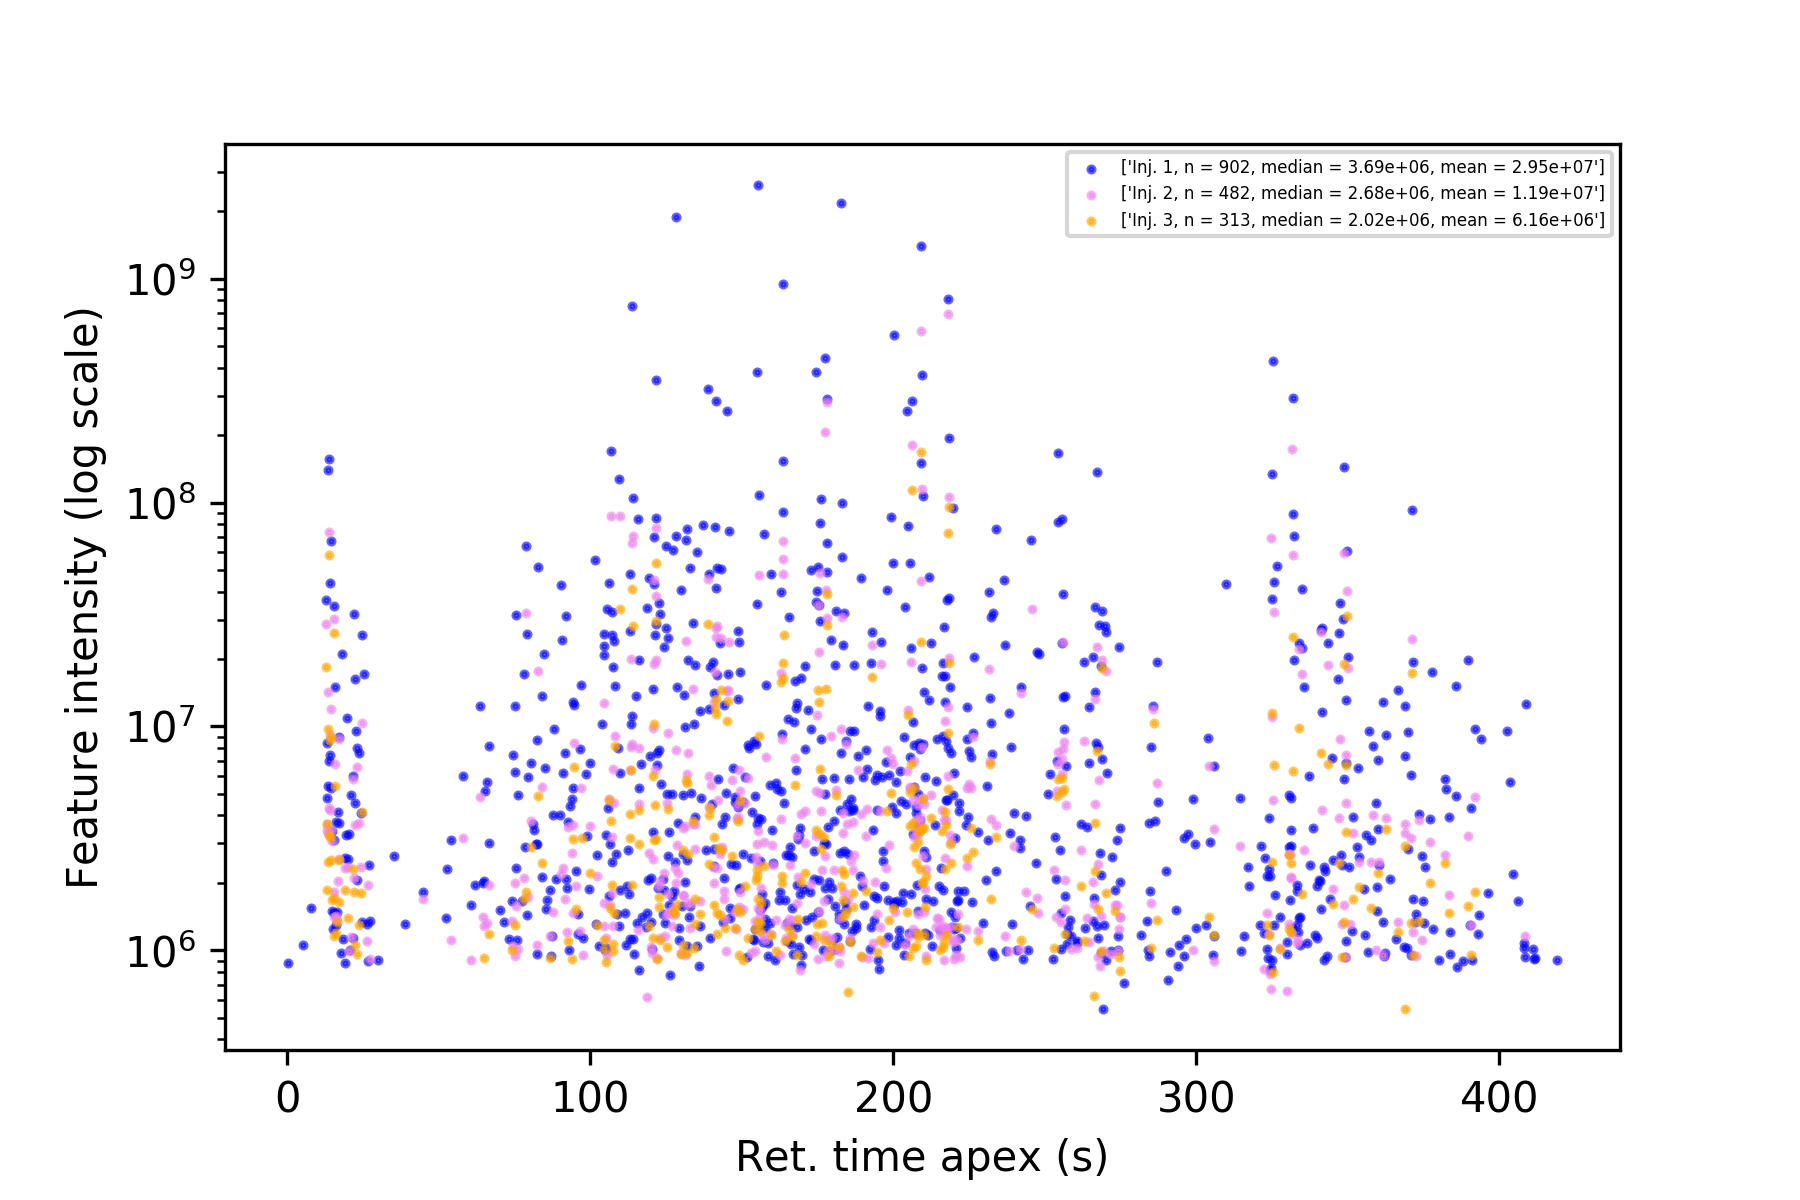

In [43]:
from IPython.display import Image
Image("results_targeted_MS2Planner_baseline/plots/injection_scatter_plot_intensity_rt.png")

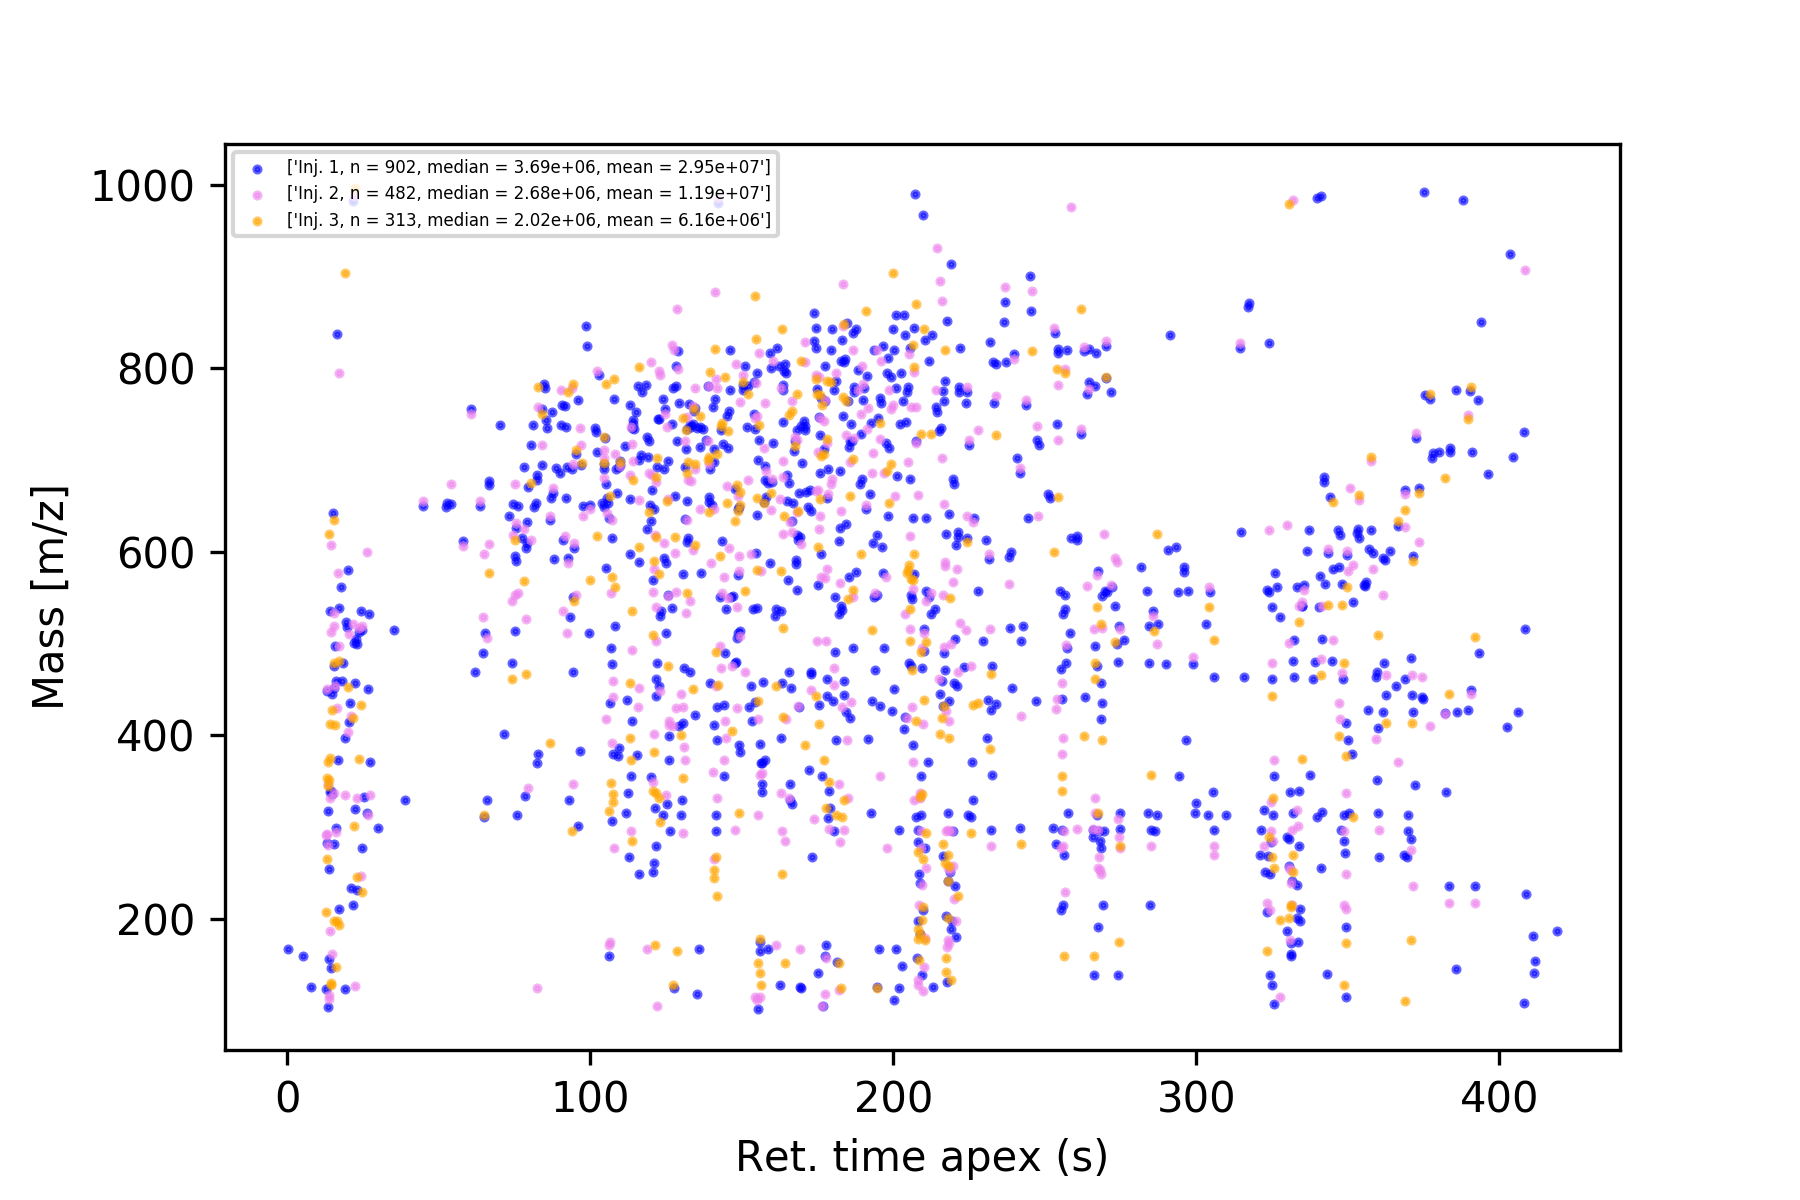

In [44]:
Image("results_targeted_MS2Planner_baseline/plots/injection_scatter_plot_mz_rt.png")

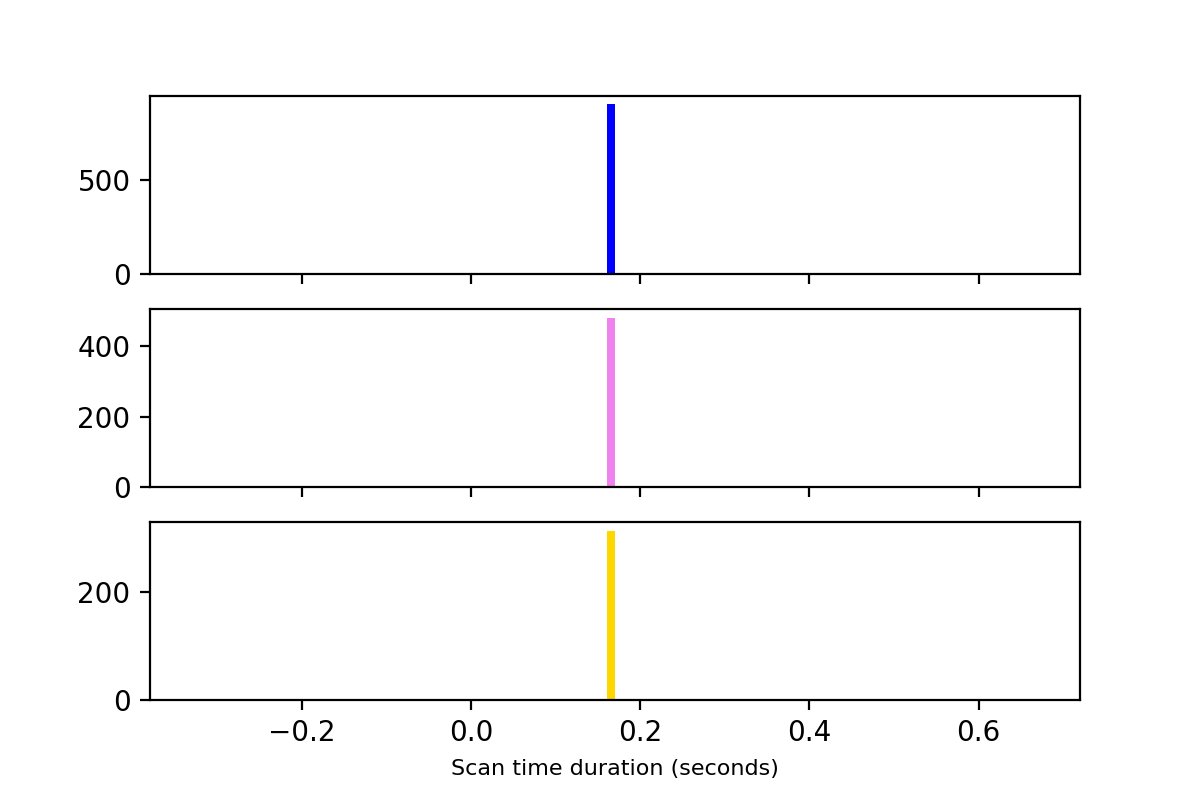

In [45]:
Image("results_targeted_MS2Planner_baseline/plots/scatter_plot_duration.png")

### MS2Planner in Apex mode

In [46]:
# Apex parameters
intensity_accu = 4e4
min_scan = 0.1
max_scan = 0.5

rt_margin = 1
transient_time = 80 #msec 

In [47]:
# Run Path Finder with Apex method
run_MS2Planner_apex_from_mzTab('OpenMS_generated', experiment_number, min_ratio_value, min_intensity_value, intensity_accu, isolation, delay, min_scan, max_scan, rt_margin, transient_time)

[I 210804 11:24:01 IODA_MS2Planner_workflow:282] STARTING THE MS2Planner WORKFLOW
[I 210804 11:24:01 IODA_MS2Planner_workflow:287] The mzTab was generated with the IODA-OpenMS workflow
[I 210804 11:24:01 IODA_MS2Planner_workflow:295] 2021-08-04 11:24:01.226993
[I 210804 11:24:01 IODA_MS2Planner_workflow:297] ======
[I 210804 11:24:01 IODA_MS2Planner_workflow:298] Getting the mzTab
[I 210804 11:24:01 IODA_MS2Planner_workflow:314] This is the input file path: TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 210804 11:24:01 IODA_MS2Planner_workflow:315] This is the output file path: results_targeted_MS2Planner_apex/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 210804 11:24:01 IODA_MS2Planner_workflow:319] ======
[I 210804 11:24:01 IODA_MS2Planner_workflow:320] Converting mzTab to intermediate table format ...
[I 210804 11:24:01 IODA_MS2Planner_workfl

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

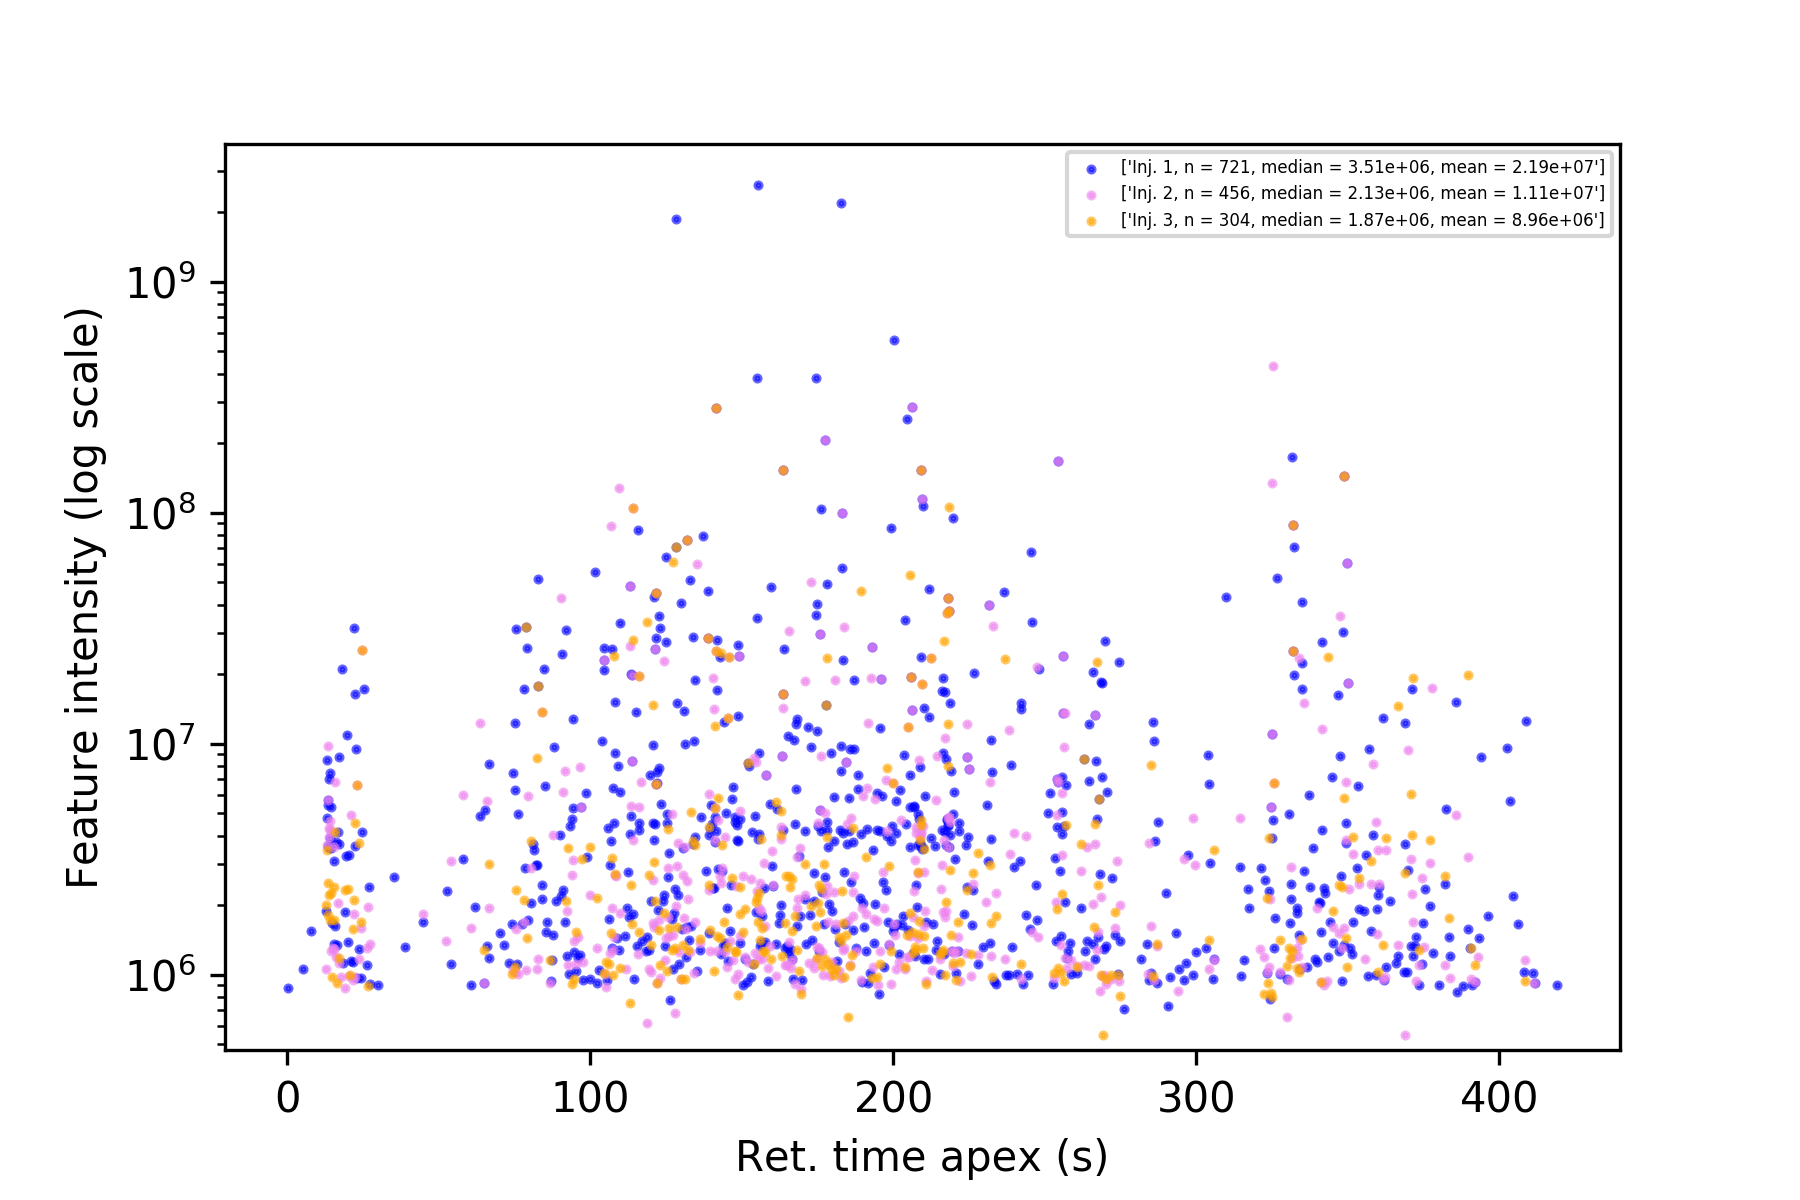

In [48]:
from IPython.display import Image
Image("results_targeted_MS2Planner_apex/plots/injection_scatter_plot_intensity_rt.png")

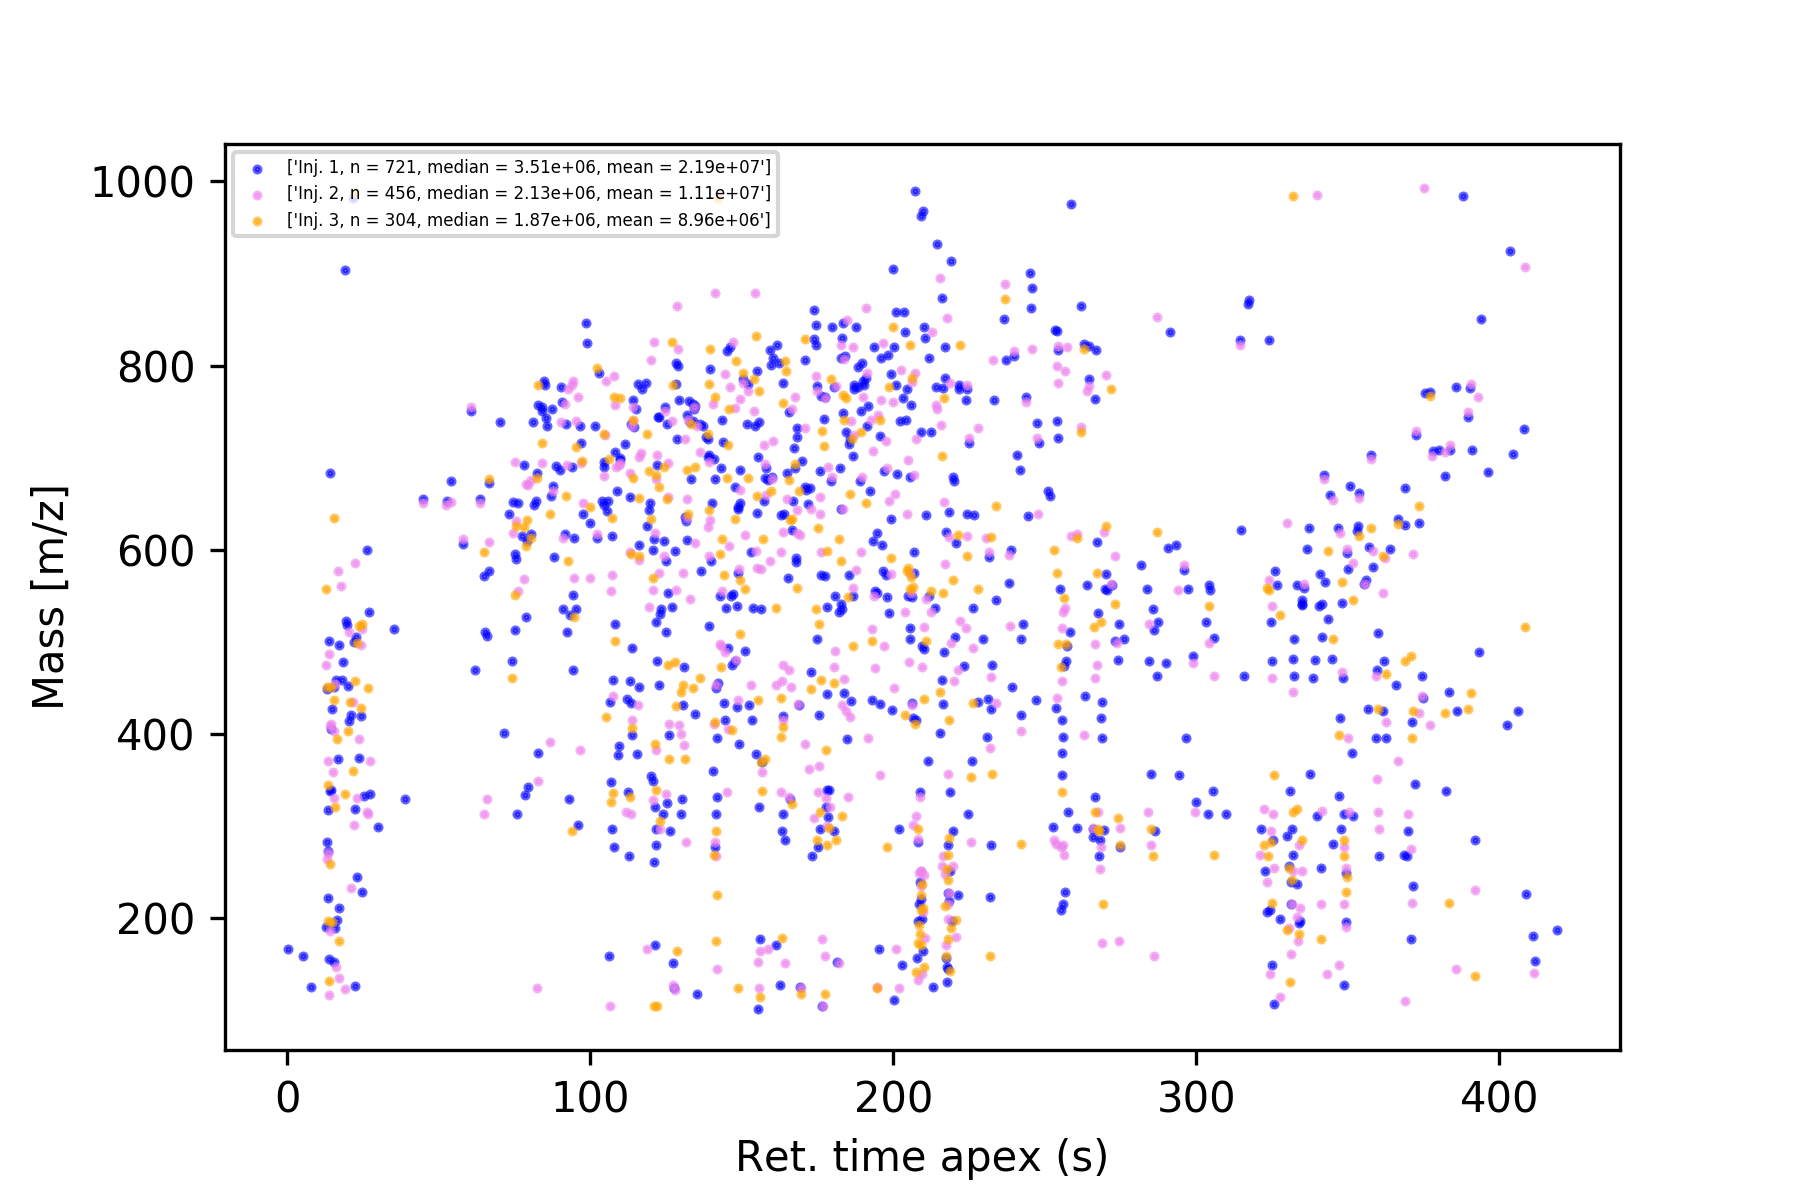

In [49]:
Image("results_targeted_MS2Planner_apex/plots/injection_scatter_plot_mz_rt.png")

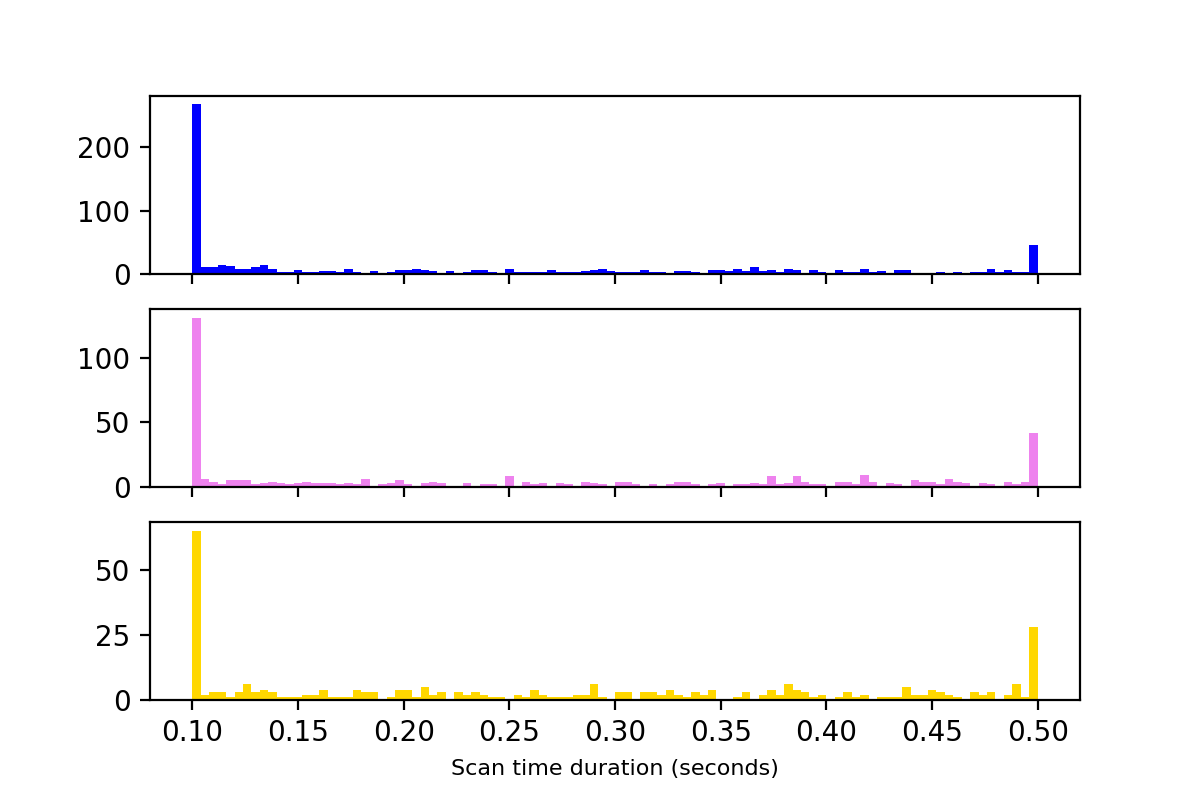

In [50]:
Image("results_targeted_MS2Planner_apex/plots/scatter_plot_duration.png")

### MS2Planner in Curve mode

In [ ]:
MS2Planner_Curve_OpenMS(input_SAMPLE)

In [51]:
# Curve parameters
rt_tolerance_curve = 2 
mz_tolerance_curve = 0.02
intensity_accu = 1e6
curve = 'kNN'

In [54]:
# Run Path Finder with Curve method
from IODA_MS2Planner_workflow import *

#run_MS2Planner_curve_from_mzTab('OpenMS_generated', experiment_number, min_ratio_value, min_intensity_value, 'OpenMS_generated', intensity_accu, rt_tolerance_curve, mz_tolerance_curve, isolation, delay, min_scan, max_scan, curve, rt_margin, transient_time)
run_MS2Planner_curve_from_mzTab('OpenMS_generated', experiment_number, min_ratio_value, min_intensity_value, input_SAMPLE, intensity_accu, rt_tolerance_curve, mz_tolerance_curve, isolation, delay, min_scan, max_scan, curve, rt_margin, transient_time)

[I 210804 11:25:57 IODA_MS2Planner_workflow:441] STARTING THE MS2Planner WORKFLOW
[I 210804 11:25:57 IODA_MS2Planner_workflow:446] The mzTab was generated with the IODA-OpenMS workflow
[I 210804 11:25:57 IODA_MS2Planner_workflow:454] 2021-08-04 11:25:57.736808
[I 210804 11:25:57 IODA_MS2Planner_workflow:456] ======
[I 210804 11:25:57 IODA_MS2Planner_workflow:457] Getting the mzTab
[I 210804 11:25:57 IODA_MS2Planner_workflow:473] This is the input file path: TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 210804 11:25:57 IODA_MS2Planner_workflow:474] This is the output file path: results_targeted_MS2Planner_curve/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 210804 11:25:57 IODA_MS2Planner_workflow:489] mzTab for the Curve mode found from the user specified path
[I 210804 11:25:57 IODA_MS2Planner_workflow:501] ======
[I 210804 11:25:57 IODA_MS2Pla

<---------- !!!!!!!!!!!!!!!!!! ---------->
Problem when running MS2Planner !!!
<---------- !!!!!!!!!!!!!!!!!! ---------->


FileNotFoundError: [Errno 2] No such file or directory: 'results_targeted_MS2Planner_curve/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd_MS2Planner.csv'

In [56]:
from IPython.display import Image
Image("results_targeted_MS2Planner_curve/plots/injection_scatter_plot_intensity_rt.png")

FileNotFoundError: No such file or directory: 'results_targeted_MS2Planner_curve/plots/injection_scatter_plot_intensity_rt.png'

FileNotFoundError: No such file or directory: 'results_targeted_MS2Planner_curve/plots/injection_scatter_plot_intensity_rt.png'

<IPython.core.display.Image object>

In [57]:
Image("results_targeted_MS2Planner_curve/plots/injection_scatter_plot_mz_rt.png")

FileNotFoundError: No such file or directory: 'results_targeted_MS2Planner_curve/plots/injection_scatter_plot_mz_rt.png'

FileNotFoundError: No such file or directory: 'results_targeted_MS2Planner_curve/plots/injection_scatter_plot_mz_rt.png'

<IPython.core.display.Image object>

In [ ]:
Image("results_targeted_MS2Planner_curve/plots/scatter_plot_duration.png")